  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.0 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.0 MB 1.

C:\Users\Kaviya Rupesh\AppData\Local\Temp\ipykernel_32068\2299556014.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R2'], palette="viridis")


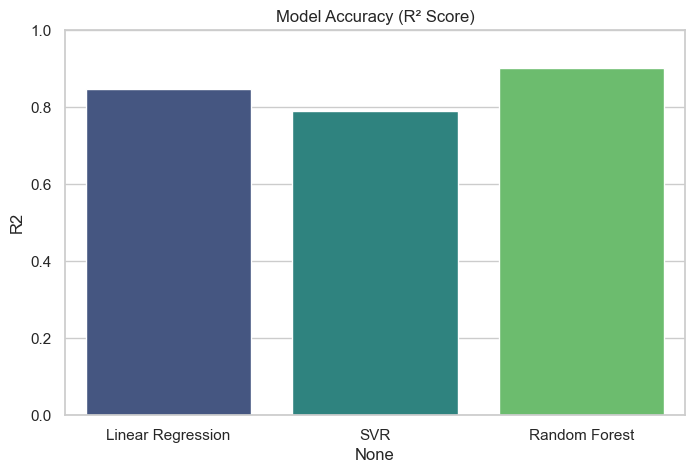


Best Model selected: Random Forest


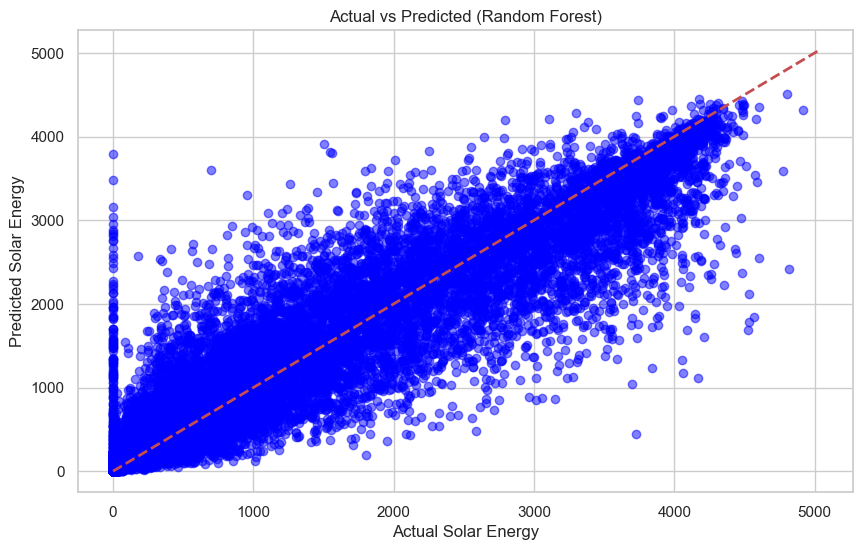

C:\Users\Kaviya Rupesh\AppData\Local\Temp\ipykernel_32068\2299556014.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[feature_cols[i] for i in indices], y=importances[indices], palette="magma")


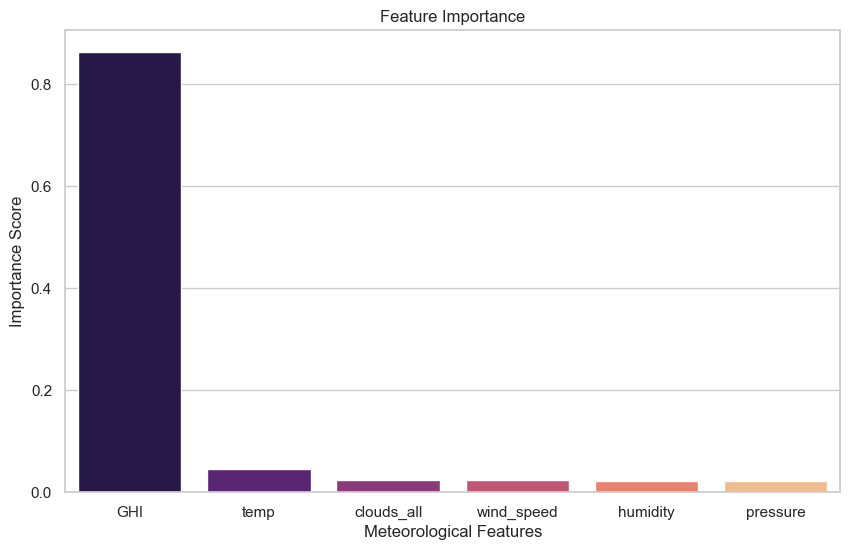


Model saved as 'solar_rf_model.pkl'
Scaler saved as 'scaler.pkl'


In [2]:

# Install missing packages (run in this Jupyter cell)
%pip install numpy pandas matplotlib seaborn scikit-learn joblib

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Set plot style
sns.set(style="whitegrid")

# 2. Load Dataset
# NOTE: Update the filename if your CSV is named differently
csv_file_path = 'solar_weather.csv' 
# csv_file_path = 'renewable-energy-and-weather-conditions.csv' 

try:
    df = pd.read_csv(csv_file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File '{csv_file_path}' not found. Please check the file name.")

# 3. Inspect Data
print("\n--- Columns in Dataset ---")
print(df.columns.tolist())

print("\n--- First 5 Rows ---")
print(df.head())

# 4. Data Cleaning
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Drop rows with missing values (if any) or impute
df = df.dropna()

# 5. Feature Selection
# Based on your dataset (solar_weather.csv), these are the likely columns:
# Features: GHI, temp, humidity, wind_speed, pressure, clouds_all
# Target: Energy delta[Wh]

feature_cols = ['GHI', 'temp', 'humidity', 'wind_speed', 'pressure', 'clouds_all']
target_col = 'Energy delta[Wh]'

print(f"\nFeatures selected: {feature_cols}")
print(f"Target selected: {target_col}")

X = df[feature_cols]
y = df[target_col]

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

# 7. Scaling (StandardScaler)
# It is good practice to scale features, especially for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Model Training & Comparison

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

print("\n--- Training Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# 9. Show Results
print("\n--- Model Performance Comparison ---")
results_df = pd.DataFrame(results).T
print(results_df)

# Plot R2 Scores
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['R2'], palette="viridis")
plt.title("Model Accuracy (R² Score)")
plt.ylim(0, 1)
plt.show()

# 10. Select Best Model (Random Forest)
best_model_name = "Random Forest"
best_model = models[best_model_name]

print(f"\nBest Model selected: {best_model_name}")

# 11. Plot Actual vs Predicted (Best Model)
y_pred_rf = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Solar Energy")
plt.ylabel("Predicted Solar Energy")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()

# 12. Feature Importance (Random Forest Only)
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[feature_cols[i] for i in indices], y=importances[indices], palette="magma")
    plt.title("Feature Importance")
    plt.xlabel("Meteorological Features")
    plt.ylabel("Importance Score")
    plt.show()

# 13. Save Model and Scaler
joblib.dump(best_model, 'solar_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel saved as 'solar_rf_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
